In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Import

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes1.csv')

In [7]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
data.shape

(768, 9)

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Understanding

In [10]:
data[data.duplicated()==True]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [11]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Data Preprocessing

In [12]:
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)# Handle missing values - Using Imputation

In [13]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [14]:
# Convert the scaled data back into a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

## Model Building

In [15]:
# Separate features and target variable
X = data_scaled_df.drop(columns=['Outcome'])
y = data_scaled_df['Outcome']

In [16]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Convert the target variable to discrete values if it's continuous
y_train = y_train.astype('int') # This assumes your target variable should be integers

## Model Training

In [18]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [19]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [20]:
# Support Vector Machine (SVM) Model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [21]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {auc:.2f}")

In [22]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
# Convert predicted probabilities to binary class labels using a threshold (e.g., 0.5)
y_pred_log_reg_binary = (y_pred_log_reg > 0.5).astype(int)

Logistic Regression Performance:


In [23]:
# Ensure y_test is also binary
y_test_binary = (y_test > 0.5).astype(int) # Convert y_test to binary using the same threshold


In [24]:
evaluate_model(y_test_binary, y_pred_log_reg_binary) # Evaluate using binary y_test


Accuracy: 0.75
Precision: 0.65
Recall: 0.67
F1-Score: 0.66
ROC-AUC: 0.74


In [25]:
# Evaluate Random Forest
print("\nRandom Forest Performance:")


Random Forest Performance:


In [26]:
# Ensure y_test is binary
y_test_binary = (y_test > 0.5).astype(int) # Convert y_test to binary using a threshold


In [27]:

evaluate_model(y_test_binary, y_pred_rf) # Evaluate using binary y_test


Accuracy: 0.73
Precision: 0.62
Recall: 0.62
F1-Score: 0.62
ROC-AUC: 0.70


In [28]:
# Evaluate SVM
print("\nSVM Performance:")


SVM Performance:


In [29]:
# Ensure both y_test and y_pred_svm are binary
y_test_binary = (y_test > 0.5).astype(int) # Convert y_test to binary using a threshold
y_pred_svm_binary = (y_pred_svm > 0.5).astype(int) # Convert y_pred_svm to binary using the same threshold


In [30]:
evaluate_model(y_test_binary, y_pred_svm_binary) # Evaluate using binary values

Accuracy: 0.73
Precision: 0.63
Recall: 0.56
F1-Score: 0.60
ROC-AUC: 0.69


In [31]:
# Logistic Regression Coefficients
log_reg_coefficients = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print("\nLogistic Regression Coefficients:")
print(log_reg_coefficients)


Logistic Regression Coefficients:
Glucose                     1.069330
BMI                         0.792371
Age                         0.430362
DiabetesPedigreeFunction    0.227094
Pregnancies                 0.216242
SkinThickness               0.047203
Insulin                    -0.198998
BloodPressure              -0.258676
dtype: float64


In [32]:
# Random Forest Feature Importance
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:")
print(rf_importance)


Random Forest Feature Importance:
Glucose                     0.258864
BMI                         0.169984
Age                         0.140931
DiabetesPedigreeFunction    0.123768
BloodPressure               0.088134
Pregnancies                 0.076551
Insulin                     0.076122
SkinThickness               0.065646
dtype: float64


In [33]:
# SHAP (SHapley Additive exPlanations) for Random Forest Model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

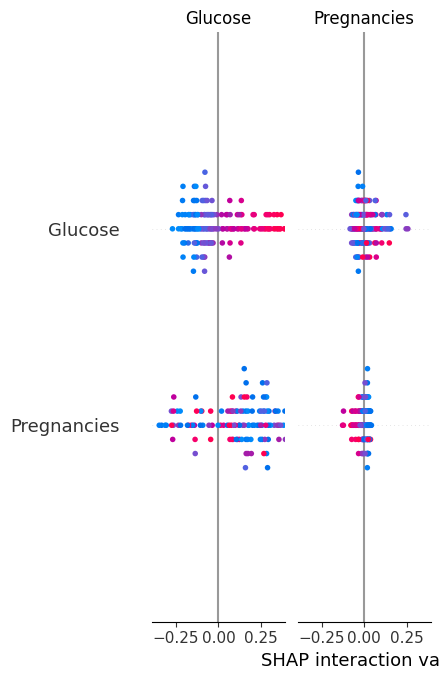

<Figure size 640x480 with 0 Axes>

In [38]:
shap.summary_plot(shap_values, X_test)
plt.savefig("shap11.png")

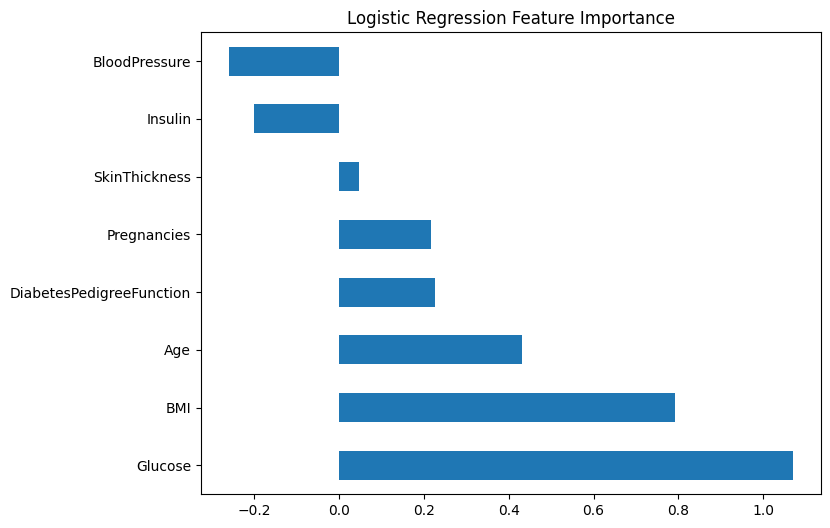

In [35]:
# Logistic Regression Coefficient Plot
plt.figure(figsize=(8,6))
log_reg_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.savefig("fien.png")
plt.show()

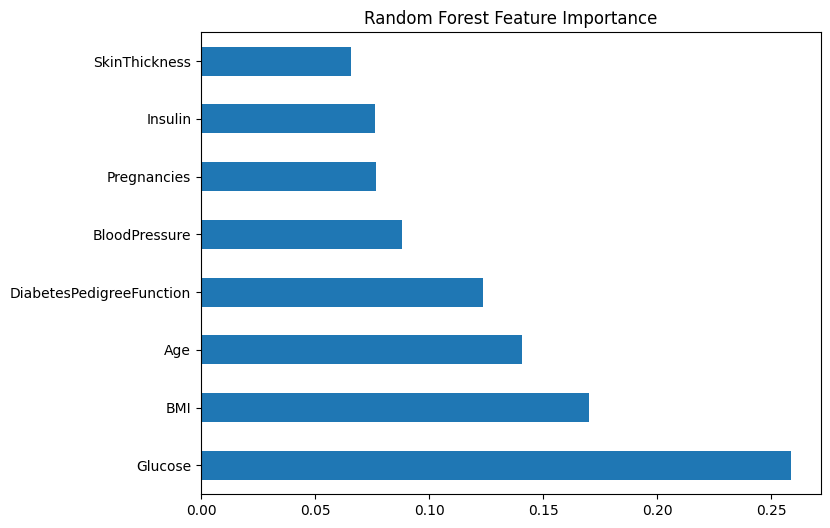

In [37]:
# Random Forest Feature Importance Plot
plt.figure(figsize=(8,6))
rf_importance.plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.savefig("Random.png")
plt.show()

In [30]:
# Sensitivity Analysis for Glucose Levels

def sensitivity_analysis(model, feature_index, feature_range, X_sample):
    results = []
    for value in feature_range:
        X_sample_mod = X_sample.copy()
        X_sample_mod[:, feature_index] = value
        predictions = model.predict_proba(X_sample_mod)[:, 1]
        results.append(np.mean(predictions))
    return results

In [31]:
# Sensitivity Analysis for Glucose
glucose_range = np.linspace(X_test['Glucose'].min(), X_test['Glucose'].max(), 100)
sensitivity_glucose = sensitivity_analysis(rf, feature_index=1, feature_range=glucose_range, X_sample=X_test.values)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

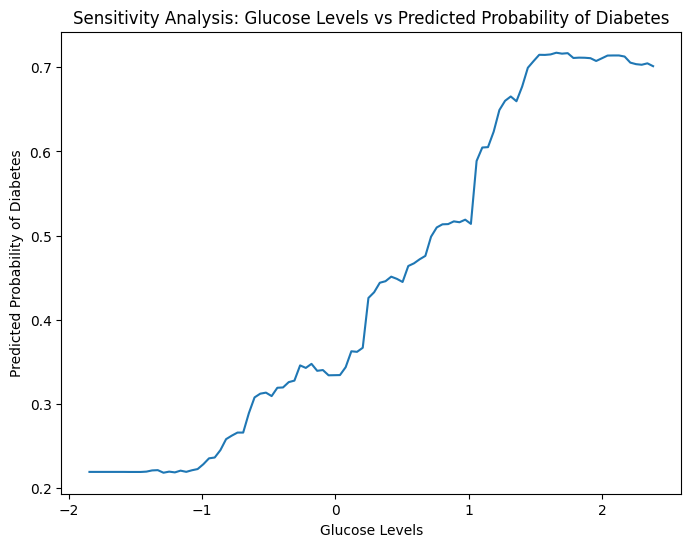

In [35]:

# Plotting Sensitivity Analysis
plt.figure(figsize=(8,6))
plt.plot(glucose_range, sensitivity_glucose)
plt.title('Sensitivity Analysis: Glucose Levels vs Predicted Probability of Diabetes')
plt.xlabel('Glucose Levels')
plt.ylabel('Predicted Probability of Diabetes')
plt.savefig("sentivspredicprob.png")
plt.show()

# Hyperparameter Tuning using ANN

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes1.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
X.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

In [ ]:
LAYERS = [
    tf.keras.layers.Dense(32, activation='relu', input_dim = 8),
    tf.keras.layers.Dense(1, activation='sigmoid')
]

model = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
LOSS_FUNCTION = 'binary_crossentropy'
OPTIMIZER = 'Adam'
METRICS = ['accuracy']

model.compile(loss= LOSS_FUNCTION,
              optimizer= OPTIMIZER,
              metrics= METRICS)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3952 - loss: 0.7755 - val_accuracy: 0.5195 - val_loss: 0.7507
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5957 - loss: 0.6970 - val_accuracy: 0.6364 - val_loss: 0.6873
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6910 - loss: 0.6319 - val_accuracy: 0.6623 - val_loss: 0.6455
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.6054 - val_accuracy: 0.6623 - val_loss: 0.6127
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5714 - val_accuracy: 0.6688 - val_loss: 0.5887
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.5339 - val_accuracy: 0.6753 - val_loss: 0.5708
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.5376 - val_accuracy: 0.6818 - val_loss: 0.5576
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7479 - loss: 0.5170 - val_accuracy: 0.7143 - val_loss

## Agenda:
1. How to select best Optimizer
2. How to select no. of nodes/neurons in a layers
3. How to select no. of layers
4. All in one model

In [ ]:
import keras_tuner as kt

### 1. How to select best Optimizer

In [ ]:
def build_model(hp):

  LAYERS = [
    tf.keras.layers.Dense(32, activation='relu', input_dim = 8),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]

  model = tf.keras.models.Sequential(LAYERS)


  LOSS_FUNCTION = 'binary_crossentropy'
  OPTIMIZER = hp.Choice('optimizer', values = ['adam', 'sgd', 'rmsprop', 'adadelta'])
  METRICS = ['accuracy']

  model.compile(loss= LOSS_FUNCTION,
                optimizer= OPTIMIZER,
                metrics= METRICS)

  return model


In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=10, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7555 - loss: 0.5465 - val_accuracy: 0.7403 - val_loss: 0.5413
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.5042 - val_accuracy: 0.7532 - val_loss: 0.5299
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7858 - loss: 0.5061 - val_accuracy: 0.7597 - val_loss: 0.5195
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 0.4906 - val_accuracy: 0.7662 - val_loss: 0.5123


## 2. How to select no. of nodes/neurons in a layers

In [ ]:
def build_model(hp):

  units = hp.Int('units', min_value = 8, max_value = 128, step=8)

  LAYERS = [
    tf.keras.layers.Dense(units= units, activation='relu', input_dim = 8),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]

  model = tf.keras.models.Sequential(LAYERS)


  LOSS_FUNCTION = 'binary_crossentropy'
  OPTIMIZER = 'rmsprop'
  METRICS = ['accuracy']

  model.compile(loss= LOSS_FUNCTION,
                optimizer= OPTIMIZER,
                metrics= METRICS)

  return model

In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory='mydir')

Reloading Tuner from mydir/untitled_project/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'units': 64}

### 3. How to select no. of layers

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_dim=8))

  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    model.add(Dense(64, activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))

  LOSS_FUNCTION = 'binary_crossentropy'
  OPTIMIZER = 'rmsprop'
  METRICS = ['accuracy']

  model.compile(loss= LOSS_FUNCTION,
                optimizer= OPTIMIZER,
                metrics= METRICS)

  return model

In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory='mydir1')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 28s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,241 (165.00 KB)

 Trainable params: 42,241 (165.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4. All in one model

In [ ]:
def build_model(hp):

  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layers',min_value= 1,max_value=10)):
    if counter == 0:
      model.add(Dense(hp.Int('units' + str(i),min_value= 8,max_value=128, step=8),
                      activation=hp.Choice('activation' + str(i), values=['relu', 'tanh']),
                      input_dim=8))


    else:
      model.add(Dense(hp.Int('units' + str(i),min_value= 8,max_value=128, step=8),
                      activation=hp.Choice('activation' + str(i), values=['relu', 'tanh'])))

    counter += 1


  model.add(Dense(1, activation='sigmoid'))


  LOSS_FUNCTION = "binary_crossentropy"
  OPTIMIZER = hp.Choice('optimizer', values = ['adam', 'sgd', 'rmsprop', 'adadelta'])
  METRICS = ["accuracy"]

  model.compile(loss=LOSS_FUNCTION,
                optimizer=OPTIMIZER,
                metrics=METRICS)

  return model


In [ ]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory='mydir2')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.4740259647369385

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 36s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'units0': 112,
 'activation0': 'relu',
 'optimizer': 'adam',
 'units1': 64,
 'activation1': 'relu',
 'units2': 88,
 'activation2': 'relu',
 'units3': 128,
 'activation3': 'relu',
 'units4': 72,
 'activation4': 'relu',
 'units5': 88,
 'activation5': 'relu'}

In [ ]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 112)                 │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           7,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 88)                  │           5,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          11,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 72)                  │           9,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 88)                  │           6,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              89 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,153 (160.75 KB)

 Trainable params: 41,153 (160.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=10, initial_epoch=6, validation_data=(X_test, y_test))

Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8156 - loss: 0.4111 - val_accuracy: 0.7468 - val_loss: 0.5586
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8191 - loss: 0.4103 - val_accuracy: 0.7403 - val_loss: 0.5482
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8077 - loss: 0.4039 - val_accuracy: 0.7792 - val_loss: 0.5531
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8498 - loss: 0.3497 - val_accuracy: 0.7597 - val_loss: 0.5588


In [ ]:
model.save("multimodel.h5")